
# Project: TMDb Movie Dataset Analysis 
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This dataset contains information about more than 10k movies collected from the Movie Database (TMDb). The dataset includes different features of movies such as title, budget, revenue, cast, director, tagline, keywords, genres, release date, runtime, etc. In this report, based on the provided dataset we will investigate and answer various questions which will help us to understand and analyze the dataset to get useful conclusions that can help to understand the factors affecting the movie's production such as budget, revenue, and earned profit.

> Herein, we will ask some questions and try to give answers to them such as:



> 1. Which year has the highest mean budget?
> 2. Has the budget had any effect on the revenue?
> 3. What is the relationship between revenue and popularity?
> 4. Which movies have the highest and lowest profit?
> 5. Does achieving maximum profit depend on having a maximum budget?
> 6. Which movies have the highest and the lowest budget?
> 7. Which movies have the highest and lowest revenue?
> 8. Which movies have the highest and the lowest popularity?
> 9. Which movies have the highest and lowest runtime?
> 10. What is the trend of profitability over the years?
> 11. What is the average budget, revenue, runtime, and profit of movies? 
> 12. What are the top genres of high profitability?
> 13. What is the top cast list of movies of high profitability?
> 14. What is the average budget , revenue , profit and runtime of high-profitable movies (successful movies)?








### Packages <a id=5></a>

In [1]:
# import packages 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

>Before going to analyze and answer the questions, we load, observe, assess and clean the dataset to be ready for further analysis. 

### General Properties

In [2]:
#loading the data
df_mov=pd.read_csv('tmdb-movies.csv')
# printing out the head lines
df_mov.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
#printing out the data tail
df_mov.tail()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


### Observations from the dataset

> 1. The data type of the column's features are float64(4), int64(6), object(11).
> 2. The data shape  showed 10866 rows and 21 columns
> 3. Budget and revenue have some 0 values, we need to deal with in the cleaning process 
> 4.The data shows many missing in imdb_id, cast, homepage, director, tagline,
     keywords, overview, genres, production_companies columns.
> 5. Tha dataset has one duplicate.
> 6. Some of features are unnecessary for the analysis of dataset. 

     

In [4]:
# to determine number of rows and columns
df_mov.shape

(10866, 21)

In [5]:
# to investigate general information about data type and estimate if there is null or not
df_mov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [6]:
# to investigate the number of nulls in the data set
df_mov.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [7]:
# to esrimate the number of duplicates in the dataset
sum(df_mov.duplicated())

1

In [8]:
df_mov.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [9]:
df_mov.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


<AxesSubplot:>

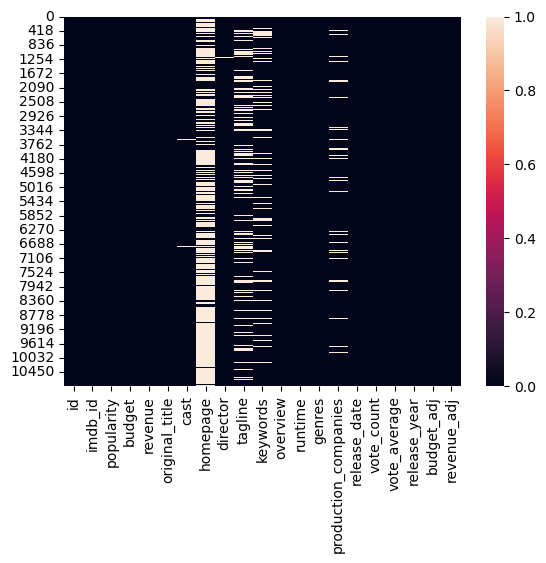

In [10]:
#to communicate the nulls visually
sns.heatmap(df_mov.isnull(),  cbar=True)

### Observations from the dataset

> 1. The data type of the column's features are float64(4), int64(6), object(11).
> 2. The data shape  showed 10866 rows and 21 columns
> 3. Budget and revenue have some 0 values, we need to deal with in the cleaning process 
> 4.The data shows many missing in imdb_id, cast, homepage, director, tagline,
     keywords, overview, genres, production_companies columns.
> 5. Tha dataset has one duplicate.
> 6. Some of features are found unnecessary for the analysis of dataset. 



### Data Cleaning (Making the data ready for analysis)


> 1. First, we need to deal with the zero values of columns revenue and budget, we can replace them by NAN, then drop them.
> 2. Dealing with null values, we decided to drop all the NAN values.
> 3. Removing duplicates.
> 4. Drop the unnecessary columns that has no effect on the analysis process such as id, imdb_id, 
     vote_count, production_company, keywords, homepage
> 5. Changing the format of release_date column to date format. 
 
  




In [11]:
#Replacing 0 values in revenue and budget by NAN
# we use for loop to replace the zero values in both columns revenue and budget
rev_bud=['revenue', 'budget']
for column in rev_bud:
    df_mov[rev_bud]=df_mov[rev_bud].replace(0, np.NAN)
df_mov[rev_bud].tail()

,revenue,budget
10861,NaN,NaN
10862,NaN,NaN
10863,NaN,NaN
10864,NaN,NaN
10865,NaN,19000.0


In [12]:
# Dealing with nulls
# Dropping NAN 

df_mov.dropna(inplace=True)

In [13]:
# checking the change in the dataframe shape
# The rows reduced to 1287 from 10866
df_mov.shape

(1287, 21)

In [14]:
#Dealing with duplicates
df_mov.drop_duplicates(inplace=True)

In [15]:
#Checking if the data still has duplicates
len(df_mov)-len(df_mov.drop_duplicates())


0

In [16]:
df_mov.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [17]:
# unnecessary columns for analysis (un_columns)
un_columns=['id',  'imdb_id', 'vote_count',  'keywords', 'homepage','budget_adj','revenue_adj','tagline' ]

In [18]:
#Remove the unnecessary columns which will not be usful for analysis
df_mov.drop(un_columns, axis =1, inplace = True)

In [19]:
#change the date format in release_date column
df_mov.release_date=pd.to_datetime(df_mov['release_date'])

In [20]:
# Checking the data shape after dropping the unnecessary columns
#The columns reduced to 13 from 21
df_mov.shape

(1287, 13)

In [21]:
df_mov.head(3)

,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_average,release_year
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,6.5,2015
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,7.1,2015
2,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,6.3,2015


<a id='eda'></a>
## Exploratory Data Analysis





<AxesSubplot:>

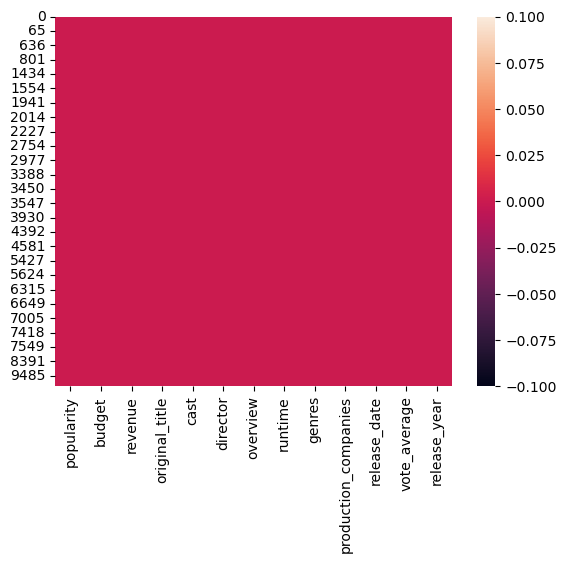

In [22]:
# Use heat map to confirm that the dataset has no NAN
sns.heatmap(df_mov.isnull(),  cbar=True)

> Heat map  confirmed that the dataset has no NAN

In [23]:
df_mov.describe()

,popularity,budget,revenue,runtime,vote_average,release_year
count,1287.000000,1.287000e+03,1.287000e+03,1287.000000,1287.000000,1287.000000
mean,1.786022,5.200349e+07,1.762444e+08,110.273504,6.279487,2007.017094
std,2.172137,5.514540e+07,2.538156e+08,18.811369,0.795955,8.060503
min,0.010335,1.000000e+00,4.300000e+01,63.000000,2.200000,1961.000000
25%,0.664783,1.400000e+07,2.565097e+07,97.000000,5.800000,2005.000000
50%,1.152354,3.200000e+07,8.208716e+07,107.000000,6.300000,2009.000000
75%,2.125342,7.000000e+07,2.140694e+08,121.000000,6.800000,2011.000000
max,32.985763,4.250000e+08,2.781506e+09,201.000000,8.300000,2015.000000


> Popularity , budget, revenue,  right skwed where the mean is larger than the median than the mode
however,vote average and  release_year are left skewed. Runtime is quite normally distibuted

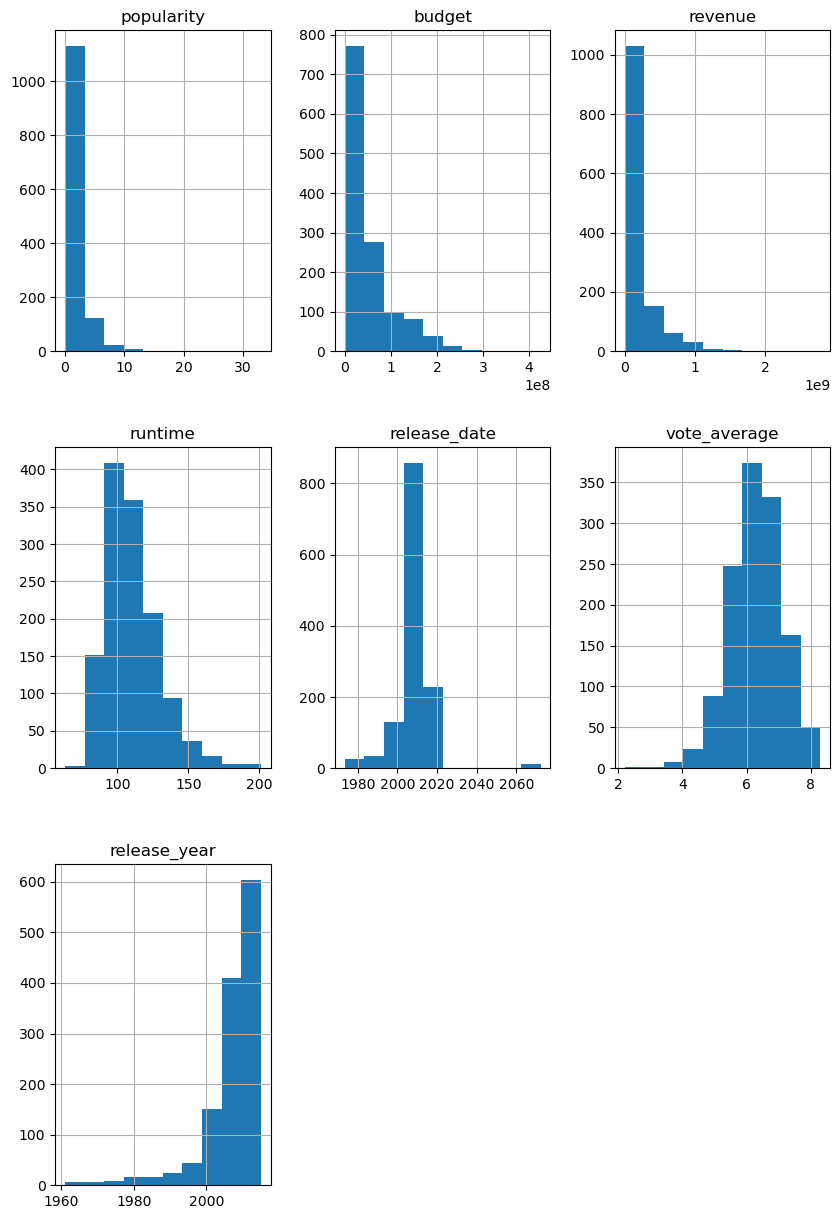

In [24]:
# Histograms were used to check the skweness of the features
df_mov.hist(figsize=(10,15));

In [25]:
df_mov.columns

Index(['popularity', 'budget', 'revenue', 'original_title', 'cast', 'director',
       'overview', 'runtime', 'genres', 'production_companies', 'release_date',
       'vote_average', 'release_year'],
      dtype='object')

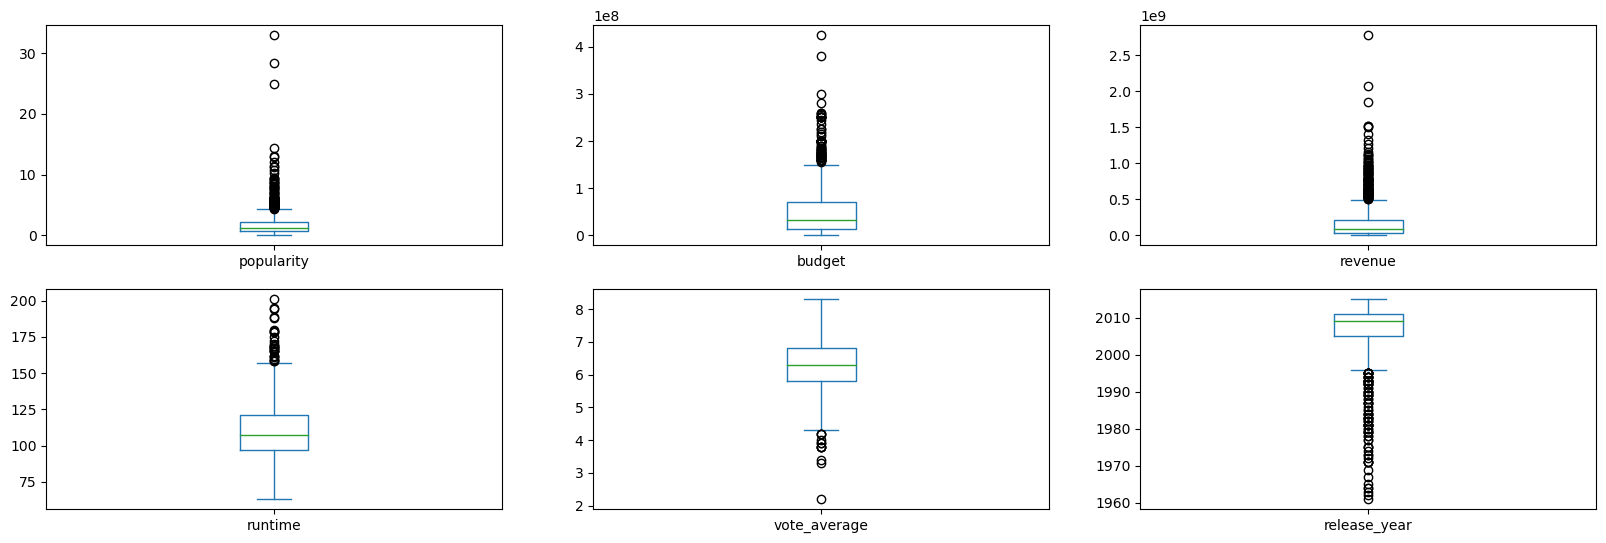

In [26]:
# Boxplot was used to check the outliers

df_mov.plot(kind = "box" , subplots = True , figsize = (20,20) , layout =(6,3))
plt.show()

> There is many outliers in 'popularity' , 'budget', 'revenue',  'vote_average' and 'runtime'


### Research Question 1 : Which year has the highest mean budget?

In [27]:
# we use groupby to investigate the mean budget over years
bud_year=df_mov.groupby('release_year').mean().budget

<AxesSubplot:xlabel='release_year'>

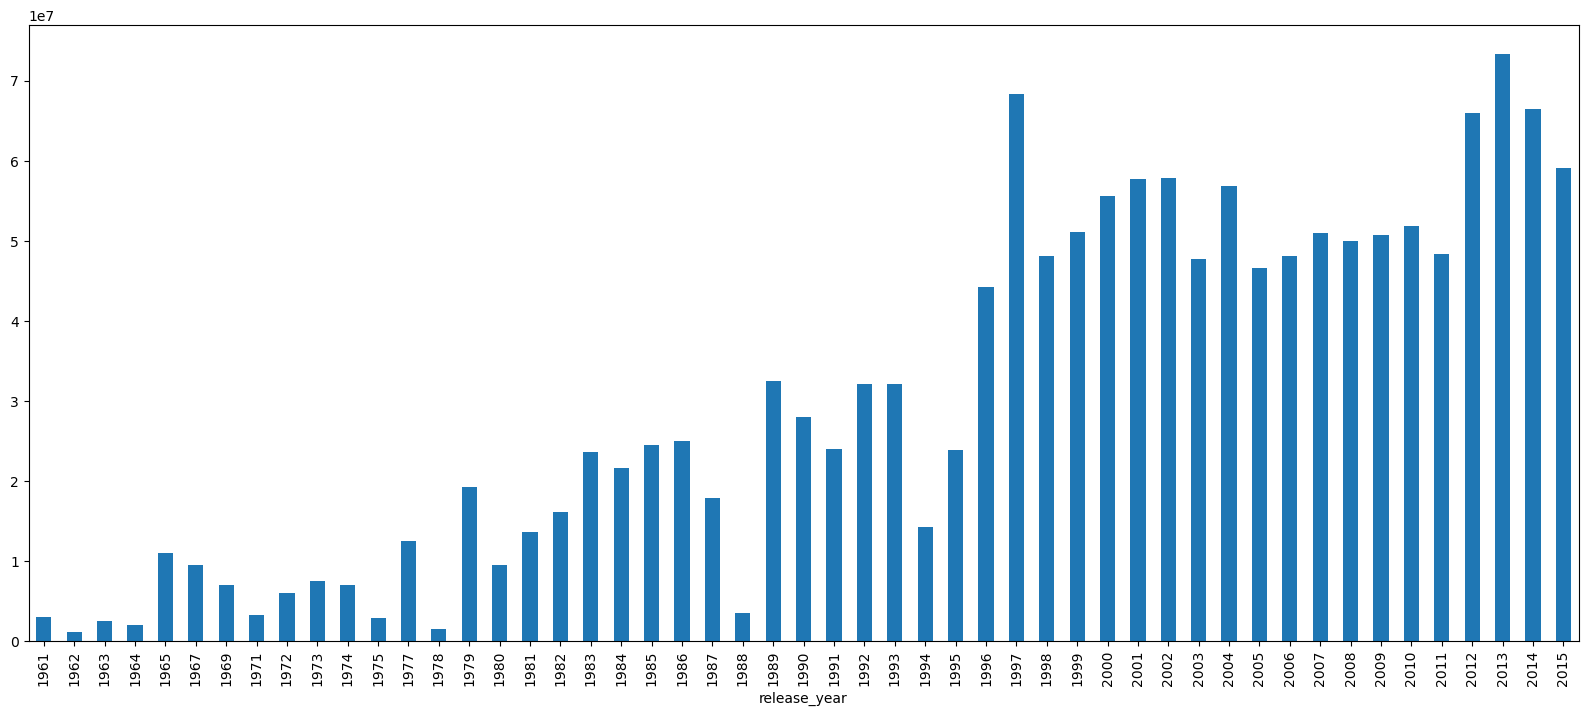

In [28]:
df_mov.groupby('release_year').mean().budget.plot(kind='bar', figsize=(20,8))

> It was found that the highest mean budget was in 2013, however the lowest mean budget was in 1962

### Research Question 2 : Has the budget had any effect on the revenue?

<AxesSubplot:>

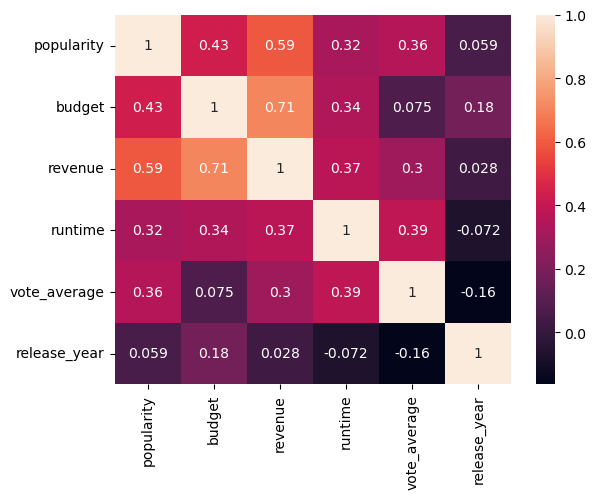

In [29]:
# use heatmap to visualize the correlation between different features
sns.heatmap(df_mov.corr(),annot=True, cbar=True)

> Strong positive correlation between the budget and the revenue.

> It means movies with high budget could get high revenue.

> Good positive correlation between popularity and revenue.

Text(0, 0.5, 'Revenue')

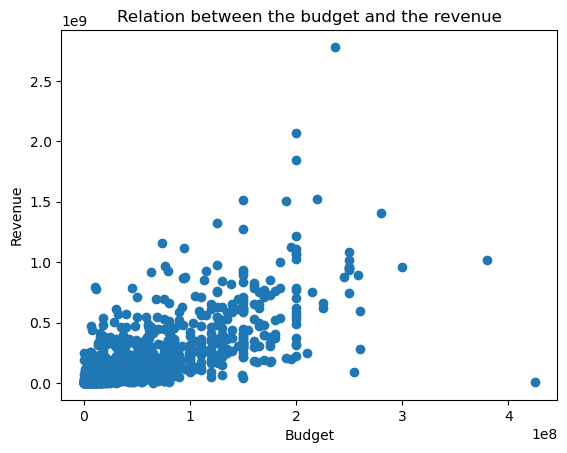

In [30]:
# Use scatter plot to assure the correlation betwwen budget and revenue
plt.scatter(x='budget', y="revenue", data=df_mov)
plt.title('Relation between the budget and the revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')


> Scatter plot confirmed the positive correlation between budget and revenue. 

> As the budget increases the revenue increases

### Research Question 2 : What is the relationship between revenue and popularity?

Text(0, 0.5, 'popularity')

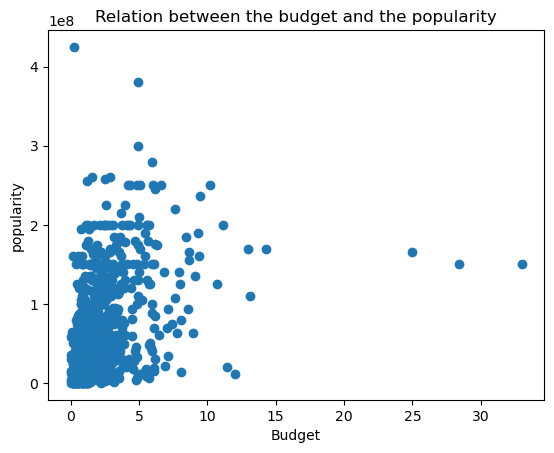

In [31]:
# Use scatter plot to assure the correlation betwwen budget and popularity

plt.scatter(y='budget', x="popularity", data=df_mov)
plt.title('Relation between the budget and the popularity')
plt.xlabel('Budget')
plt.ylabel('popularity')


> The more you spend on the movie (high budget), the more chances of  the movie to become popular

### Research Question 3: What is the relation between revenue and popularity?

Text(0, 0.5, 'popularity')

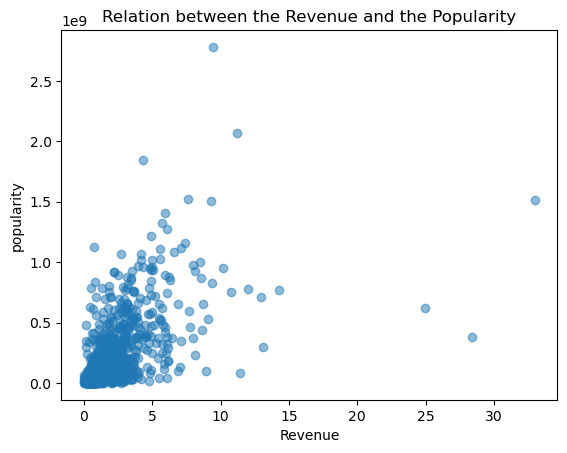

In [32]:
# Use scatter plot to assure the correlation betwwen Revenue and popularity
plt.scatter(y='revenue', x="popularity", data=df_mov, alpha=0.5)
plt.title('Relation between the Revenue and the Popularity')
plt.xlabel('Revenue')
plt.ylabel('popularity')

> The more popularity means higher revenues

### Research Question 4 :  Which movies have the highest and lowest profit?

In [33]:
# adding new feature profit
# profit is the difference of revenue and budget
#profit=revenue-budget

profit=df_mov['revenue']- df_mov['budget']
df_mov.insert(3, 'profit', profit)

#checking  the new column in dataset
df_mov.head(3)

,popularity,budget,revenue,profit,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_average,release_year
0,32.985763,150000000.0,1.513529e+09,1.363529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,6.5,2015
1,28.419936,150000000.0,3.784364e+08,2.284364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,7.1,2015
2,13.112507,110000000.0,2.952382e+08,1.852382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,6.3,2015


Text(0, 0.5, 'popularity')

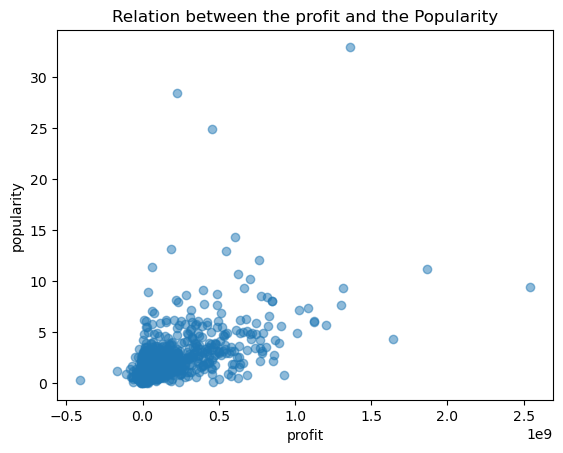

In [34]:
# Investigate the correlation between popularity and profit
plt.scatter(x='profit', y="popularity", data=df_mov, alpha=0.5)
plt.title('Relation between the profit and the Popularity')
plt.xlabel('profit')
plt.ylabel('popularity')

> Positive correlation between profit and popularity.

> Movies with high profit has high popularity (successful movies).

### Research Question 5 :  Does achieving maximum profit depend on having a maximum budget?

<AxesSubplot:xlabel='release_year'>

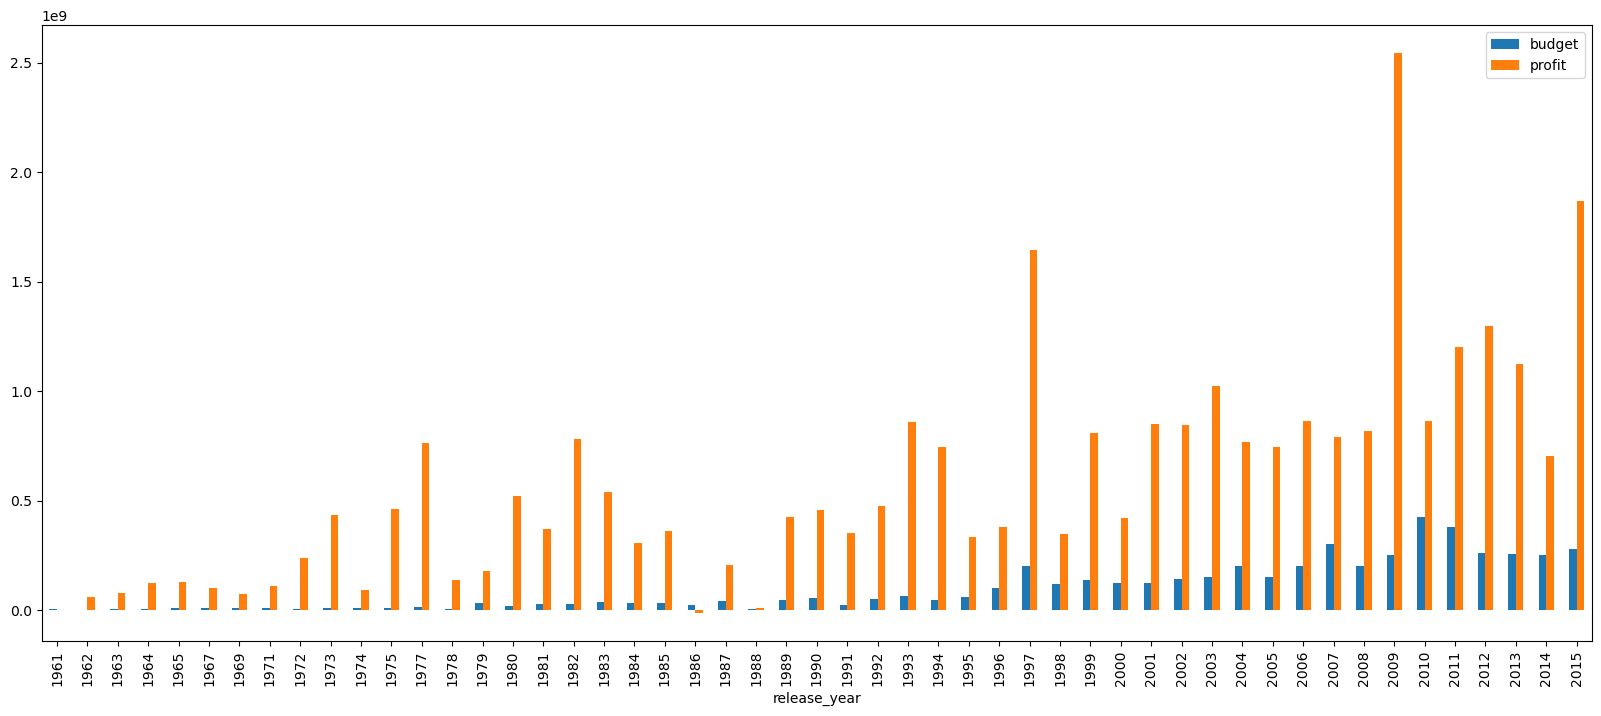

In [35]:
# We could communicate the result visually using bar plot
df_mov.groupby('release_year').max()[['budget', 'profit']].plot(kind='bar', figsize=(20,8))


> The bar chart shows comparison between the profit and the budget over years. 

> It indicates in 2009 was the highest profit althought in this year it was not the maximum budget.

> We concluded that achieving maximum profits does not depend on having maxmium budget.

### Research Question 6 :  Which movies have the highest and the lowest budget?

In [36]:
# we will build a function to find the minmium and maximum of specific feature
# It will allow us to avoid the code repetition.

def min_max(feature):
    #using max function to select the maximum
    max_feature=df_mov[feature].max()
    #filtering the data by max then use transpose function to convert row to column
    max_=df_mov[df_mov[feature]==max_feature].transpose()
       
    #using min function to select the minmum
    min_feature=df_mov[feature].min()
    #filtering the data by max then use transpose function to convert row to column
    min_=df_mov[df_mov[feature]==min_feature].transpose()
    
    #we combined the two data frame (the maxmium and the minimum)
    df_min_max=pd.concat([max_,min_],axis=1, join="outer")
    # rename the index of max and min and replacing by maxmium_feature and minimum_feature
    df_min_max.rename(columns = {df_mov[feature].idxmax():('maximum_{}'.format(feature)), df_mov[feature].idxmin():('minimum_{}'.format(feature))}, inplace=True)
    return df_min_max
    


In [37]:
# we call the function to show  the information of the movie of maxmium and lowest profit 
min_max('profit')

,maximum_profit,minimum_profit
popularity,9.432768,0.25054
budget,237000000.0,425000000.0
revenue,2781505847.0,11087569.0
profit,2544505847.0,-413912431.0
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
overview,"In the 22nd century, a paraplegic Marine is di...",An Asian assassin (Dong-gun Jang) is forced to...
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller


> The The Warrior's Way movie in 2010 has the minimum gained profit.

> However,  Avatar movie in 2009 has the maximum gained profit.

In [38]:
# we call the function to show  the information of the movie of maxmium and lowest budget 

min_max('budget')

,maximum_budget,minimum_budget
popularity,0.25054,0.52043
budget,425000000.0,1.0
revenue,11087569.0,1378.0
profit,-413912431.0,1377.0
original_title,The Warrior's Way,"Love, Wedding, Marriage"
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Mandy Moore|Kellan Lutz|Jessica Szohr|Autumn F...
director,Sngmoo Lee,Dermot Mulroney
overview,An Asian assassin (Dong-gun Jang) is forced to...,A happy newlywed marriage counselor's views on...
runtime,100,90
genres,Adventure|Fantasy|Action|Western|Thriller,Comedy|Romance


> The The Warrior's Way movie in 2010 has the maximum budget.

> However, Love, Wedding, Marriage movie in 2011 has the minimum budget.

### Research Question 7 :  Which movies have the highest and lowest revenue?

In [39]:
# we call the function to show  the information of the movie of maxmium and lowest revenue 
min_max('revenue')

,maximum_revenue,minimum_revenue
popularity,9.432768,0.028456
budget,237000000.0,3.0
revenue,2781505847.0,43.0
profit,2544505847.0,40.0
original_title,Avatar,Boy
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Rolleston|Craig Hall|Taika Waititi|Te Ah...
director,James Cameron,Taika Waititi
overview,"In the 22nd century, a paraplegic Marine is di...","It's 1984, and Michael Jackson is king - even ..."
runtime,162,87
genres,Action|Adventure|Fantasy|Science Fiction,Drama|Comedy


> The Avatar movie in 2009 has the maximum revenue.

> However, Boy movie in 2010 has the minimum revenue.

### Research Question 8:  Which movies have the highest and the lowest popularity?

In [40]:
# we call the function to show  the information of the movie of maxmium and lowest popularity 
min_max('popularity')

,maximum_popularity,minimum_popularity
popularity,32.985763,0.010335
budget,150000000.0,30000000.0
revenue,1513528810.0,68129518.0
profit,1363528810.0,38129518.0
original_title,Jurassic World,Ð¡Ñ‚Ð°Ð»Ð¸Ð½Ð³Ñ€Ð°Ð´
cast,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Thomas Kretschmann|Yanina Studilina|Philippe R...
director,Colin Trevorrow,Fyodor Bondarchuk
overview,Twenty-two years after the events of Jurassic ...,"Drama set in 1942, during one of the most impo..."
runtime,124,131
genres,Action|Adventure|Science Fiction|Thriller,War|Action


In [41]:
# The title of the movie of the minimum popularity (Ð¡Ñ‚Ð°Ð»Ð¸Ð½Ð³Ñ€Ð°Ð´) has strange characters 
# and we can not identify the name.
# We made a search about the movie's name on the internet using the other available information such as cast and director
# We found the correct name of the movie is Stalingrad
# We have to replace the old name of the movie with the correct name in the dataframe

In [42]:
# First we find the row in the dataset that has wrong title of movie (Ð¡Ñ‚Ð°Ð»Ð¸Ð½Ð³Ñ€Ð°Ð´)
df_mov[df_mov['original_title']== "Ð¡Ñ‚Ð°Ð»Ð¸Ð½Ð³Ñ€Ð°Ð´"]

,popularity,budget,revenue,profit,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_average,release_year
6065,0.010335,30000000.0,68129518.0,38129518.0,Ð¡Ñ‚Ð°Ð»Ð¸Ð½Ð³Ñ€Ð°Ð´,Thomas Kretschmann|Yanina Studilina|Philippe R...,Fyodor Bondarchuk,"Drama set in 1942, during one of the most impo...",131,War|Action,Art Pictures Studio,2013-10-09,5.5,2013


In [43]:
# Second, we replace the wrong name with the correct name in the data frame
df_mov['original_title']=df_mov['original_title'].replace(["Ð¡Ñ‚Ð°Ð»Ð¸Ð½Ð³Ñ€Ð°Ð´"],"Stalingrad")


In [44]:
# Again, we call the function to show  the information of the movie of maxmium and lowest popularity
# Now, we will have the correct name of the movie of least popularity
min_max('popularity')

,maximum_popularity,minimum_popularity
popularity,32.985763,0.010335
budget,150000000.0,30000000.0
revenue,1513528810.0,68129518.0
profit,1363528810.0,38129518.0
original_title,Jurassic World,Stalingrad
cast,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Thomas Kretschmann|Yanina Studilina|Philippe R...
director,Colin Trevorrow,Fyodor Bondarchuk
overview,Twenty-two years after the events of Jurassic ...,"Drama set in 1942, during one of the most impo..."
runtime,124,131
genres,Action|Adventure|Science Fiction|Thriller,War|Action


> The Jurassic World movie in 2015 has the maximum popularity.

> However, Stalingrad movie in 2013 has the minimum popularity.

### Research Question 9 :  Which movies have the highest and lowest runtime?

In [45]:
# we call the function to show  the information of the movie of maxmium and lowest runtime 

min_max('runtime')

,maximum_runtime,minimum_runtime
popularity,7.122455,1.425344
budget,94000000.0,30000000.0
revenue,1118888979.0,14460000.0
profit,1024888979.0,-15540000.0
original_title,The Lord of the Rings: The Return of the King,Winnie the Pooh
cast,Elijah Wood|Ian McKellen|Viggo Mortensen|Liv T...,Jim Cummings|Travis Oates|Jim Cummings|Bud Luc...
director,Peter Jackson,Stephen Anderson|Don Hall
overview,Aragorn is revealed as the heir to the ancient...,"During an ordinary day in Hundred Acre Wood, W..."
runtime,201,63
genres,Adventure|Fantasy|Action,Animation|Family


> The The Lord of the Rings: The Return of the King	 movie in 2003 has the maximum runtime.

> However, Winnie the Pooh movie in 2011 has the minimum runtime.

### Research Question10  : What is the trend of profitability over the years?

<Figure size 2000x1500 with 0 Axes>

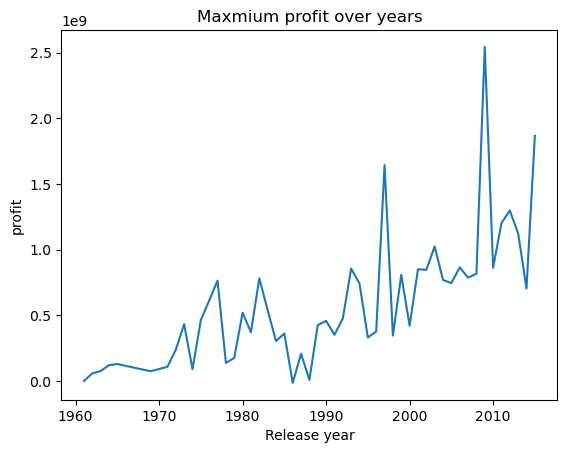

<Figure size 2000x1500 with 0 Axes>

In [46]:
max_profit_year=df_mov.groupby('release_year').max().profit
plt.plot(max_profit_year )
plt.xlabel('Release year')
plt.ylabel('profit')
plt.title('Maxmium profit over years')
plt.figure(figsize=(20,15))

<Figure size 1000x2000 with 0 Axes>

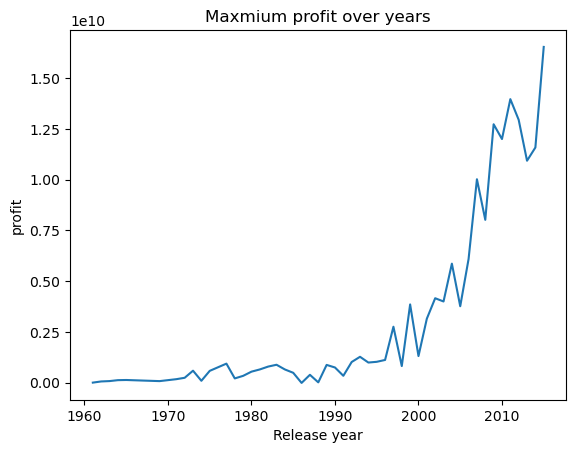

<Figure size 1000x2000 with 0 Axes>

In [47]:
max_profit_year=df_mov.groupby('release_year').sum().profit
plt.plot(max_profit_year )
plt.xlabel('Release year')
plt.ylabel('profit')
plt.title('Maxmium profit over years')
plt.figure(figsize=(10,20))


> Although there is fluctuation however the general trend showed an increasing in the profitability.

> The profit is increased by increasing the release year of the movie.

### Research Question 11  : What is the average budget, revenue, runtime, and profit of movies? 

In [48]:
# Use for loop to calculate the mean of eeach feature

features=['budget', 'revenue', 'profit']

for feature in features:
    #calculate the mean
    feature_average=df_mov[feature].sum()/len(df_mov[feature])
    #divide the mean by 1000000 to convert to millions
    feature_average=(feature_average)/1000000
    print(feature,feature_average)
    

budget 52.00349235198135
revenue 176.2444386853147
profit 124.24094633333333


In [49]:
runtime_average=df_mov['runtime'].sum()/len(df_mov[feature])
runtime_average

110.27350427350427

> The movies have an average budget of 52 million dollar.
> The movies have an average revenue of 176.24 million dollar.
> The movies have an average profit of 124.24 million dollar.
> The movies have an average runtime of 110 min.

### Research Question 12  : What are the top genres of high profitability?

In [50]:
# we consider the movies have a good or high profit if the profit is more than the mean value
df_pr=df_mov.query('profit > 124240946.33')
df_pr.head(3)

,popularity,budget,revenue,profit,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_average,release_year
0,32.985763,150000000.0,1.513529e+09,1.363529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,6.5,2015
1,28.419936,150000000.0,3.784364e+08,2.284364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,7.1,2015
2,13.112507,110000000.0,2.952382e+08,1.852382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,6.3,2015


In [51]:
df_pr.shape

(366, 14)

In [52]:
df1=df_pr.copy()


In [53]:
# we will select the first genre of each row
# Our analysis will depend on the first genre described in genres column

# columns to split
split_columns = ['genres', 'cast']

# apply split function to each column  to select the first genre in each row of genres column
for c in split_columns:
    df1[c] = df1[c].apply(lambda x: x.split("|")[0])
    


In [54]:
df1.head(3)

,popularity,budget,revenue,profit,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_average,release_year
0,32.985763,150000000.0,1.513529e+09,1.363529e+09,Jurassic World,Chris Pratt,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,6.5,2015
1,28.419936,150000000.0,3.784364e+08,2.284364e+08,Mad Max: Fury Road,Tom Hardy,George Miller,An apocalyptic story set in the furthest reach...,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,7.1,2015
2,13.112507,110000000.0,2.952382e+08,1.852382e+08,Insurgent,Shailene Woodley,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,6.3,2015


In [55]:
profit_genres=df1['genres'].value_counts(ascending=True)


In [56]:
profit_genres.tail()


Animation    35
Comedy       41
Drama        47
Adventure    76
Action       82
Name: genres, dtype: int64

In [57]:
locations=profit_genres.index
locations

Index(['Western', 'Mystery', 'War', 'History', 'Romance', 'Family', 'Crime',
       'Thriller', 'Horror', 'Science Fiction', 'Fantasy', 'Animation',
       'Comedy', 'Drama', 'Adventure', 'Action'],
      dtype='object')

Text(0.5, 1.0, 'Genres of movies of high profit')

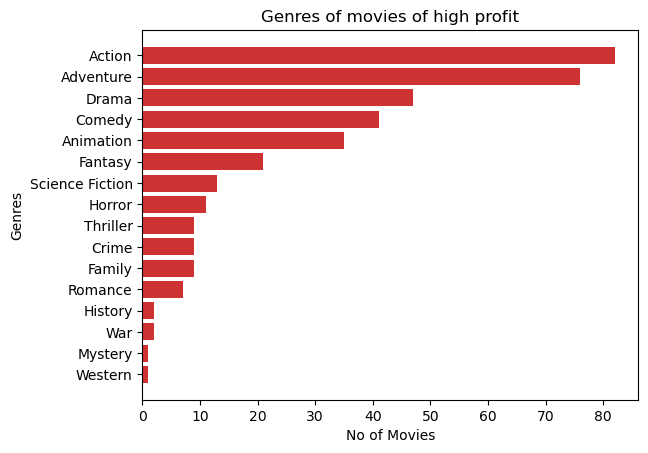

In [58]:
# use hbar to plot the genres vs no of movies
profit_genres=profit_genres.sort_values(ascending= True)
plt.barh(locations, profit_genres, color='#CD3333')
plt.xlabel('No of Movies')
plt.ylabel('Genres')
plt.title('Genres of movies of high profit')


> The figure shows the genres of the movies of high profitability.

> Action, Adventure, Drama and Comedy are on the top list of genres of movies of high profitability.

### Research Question 13 : What is the top cast list of movies of high profitability?


In [59]:
profit_cast=df1['cast'].value_counts()
profit_cast.head()

Tom Cruise           10
Tom Hanks             9
Robert Downey Jr.     7
Christian Bale        7
Leonardo DiCaprio     6
Name: cast, dtype: int64

> Actors:  Tom Cruise, Tom Hanks are on the top list of cast of movies of high profitability.

### Research Question 14  : What is the average budget , revenue , profit and runtime of high-profitable movies (successful movies)?

In [60]:
# Use for loop to calculate the mean of each feature
for feature in features:
    features=['budget', 'revenue','profit']
    #calculate the mean
    feature_average=df_pr[feature].sum()/len(df_pr[feature])
    #divide the mean by 1000000 to convert to millions
    feature_average=(feature_average)/1000000
    print(feature,feature_average)

budget 98.28248633879781
revenue 467.62130900546447
profit 369.33882266666666


In [61]:
runtime_average=df_pr['runtime'].sum()/len(df_pr[feature])
runtime_average

118.1311475409836

> The profitable movies have an average budget of 98.28 million dollar.

> The profitable movies have an average revenue of 467.62 million dollar.

> The profitable movies have an average profit of 369.34 million dollar.

> The profitable movies have an average runtime of 118 min.

<a id='conclusions'></a>
## Conclusions







> The TMDb movies dataset was assesed, and cleaned before its analysis. The explaratory data analysis answered many important     questions that help give some important insights and facts about movies. We come out with the following conclusions:

> This was a very interesting data analysis. We came out with some very interesting facts about movies. After this analysis we   can conclude following:

> The successful movie (high profit*) could make an average revenue of 467.62 million dollar.
> When the movie has one from the actors(cast)  Tom Cruise, Tom Hanks, the movie could acheive high profitability.
> Movies of genres action, adventure, drama and comedy will have high chances to make good profit.
> A movie could achieve high profit if it has an average budget of 98.3 million dolar and average duration of 118 min.
> It is not always true that the maximum budget for movies could achieve maximum profit.

>*Limitations*

>* We consider a movie has a high profitabilty when it achieves profitabilty more than the average profit (124.24 million dollar.)
> The provided data was incomplete and have some mistakes, so, We dropped all data that have zero and missing values.
> The currency of the revenue and budget were not given. So, we assumed all currencies in US Dollars.
> The analysis of the highest profit genres was based on the first genre of each entry of the genres column.
> The analysis of the highest profit cast was based on the first actor of each entry of the cast column.
> All these limitations could affect the overall analysis.

